## Data Exploration

โดยชุดข้อมูลนี้ต้องการให้เราทำนายว่าผู้ใช้งาน credit_card จะมีแนวโน้มว่าจะยกเลิก หรือ จะใช้งาน credit_card ต่อไปโดยวิเคราะห์จาก feature ที่มี
จากข้อมูลที่ได้มามี feature ทั้งหมด 23 feature และมี sample ทั้งหมด 10127 คน จากคำแนะนำของชุดข้อมูลได้ทำการลบ 2 feature สุดท้ายออก<br>
แยก feature Attrition_Flag ออกมาเก็บในตัวแปล df_y เหลือชุดข้อมูลในการวิเคราะห์ทั้งหมด 20 feature

In [581]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

df = pd.read_csv('credit_card_churn.csv',sep=',')
df.columns = ["CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
df_y = df["Attrition_Flag"]
df = df.drop(["Attrition_Flag","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis = 1)
print(df.shape)
df.head()

(10127, 20)


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


โดยชุดข้อมูลของคนที่ใช้ Credit card อยู่ในปัจจุบันมีจำนวน 8500 คน และ ยกเลิก Credit card มีจำนวน 1627 คน<br>
จากการ check ข้อมูลไม่มี missing value ในชุดข้อมูล

In [582]:
print(df_y.value_counts())
print("")
# ดู missing valus
print(df.isnull().sum())
print(df.shape)
# code handmake
# for i in range(0,len(df.columns)):
#     print(df.columns[i] +"\t\t"+ str(df[str(df.columns[i])].isnull().sum()))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
(10127, 20)


## Data Preprocessing

แยกข้อมูลเป็นออกเป็น 2 ส่วน
- Numerical
- Categorical
    - One-Hot Encoding

และแบ่ง Data เป็น 3 ชุดสำหรับการทดลอง
- 1.ใส่ Attribute ทั้งหมด
- 2.ทำ Feature Selection โดยดูจากความสัมพันธ์
- 3.ทำ PCA

แยกชุดข้อมูลประเภท numeric and Categorical และเพื่ม y ที่เปลี่ยนข้อมูลจาก["Existing Customer","Attrited Customer"] เป็น [1,0] เข้าไปในข้อมูลทั้ง 2 ประเภท<br> 

In [583]:

df_class = df.select_dtypes(object)
df_numer = df.drop(df_class.columns,axis= 1)
df_y = df_y.replace(["Existing Customer","Attrited Customer"],[1,0])
# เพื่ม y 
df_class = df_class.join([df_y])
df_numer = df_numer.join([df_y])
print("numeric : "+str(df_numer.shape))
print("class : "+str(df_class.shape))
# df_numer = df.drop(df_class.columns)


numeric : (10127, 16)
class : (10127, 6)


one-hot ข้อมูลประเภท Categorical ในอยู่ในแบบใน numeric 

In [584]:
df_class = pd.get_dummies(df_class)
print(len(df_class.shape))
# print(len(df_class.columns))

2


## Feature extraction

### Feature Selection โดยดูจากความสัมพันธ์

Plot heatmap numeric

In [585]:
# corr = df_numer.corr()
# mask = np.array(corr)
# # print(corr)
# mask[np.tril_indices_from(mask)] = False     
# fig,ax = plt.subplots()
# fig.set_size_inches(10,5)
# sns.heatmap(corr,mask= mask,vmax =1,vmin = -1,annot= True,cmap= 'coolwarm')
Image(url="pic/heatmap numeric.png", width=300, height=300)

Plot heatmap Categorical

In [586]:
# corr = df_class.corr()
# mask = np.array(corr)
# # print(corr)
# mask[np.tril_indices_from(mask)] = False     
# fig,ax = plt.subplots()
# fig.set_size_inches(10,5)
# sns.heatmap(corr,mask= mask,vmax =1,vmin =-1,annot= True,cmap= 'coolwarm')
Image(url="pic/heatmap classification.png", width=300, height=300)

Pairplot numeric

In [587]:
# sns.pairplot(df_class,hue="Attrition_Flag")
Image(url="pic/pairplot classification.png", width=300, height=300)

Pairplot Categorical

In [588]:
# sns.pairplot(df_numer,hue="Attrition_Flag")
Image(url="pic/pairplot numeric.png", width=300, height=300)

In [589]:
Image(url="pic/pairplot highlight.png", width=300, height=300)

จากการ pairplot ข้อมูลประเภท numeric มาว่ามีช่วงที่มีการแบ่งกลุ่มอย่างชัดเจนในช่วงสีแดง และสีฟ้า

ผมจึงได้เลือก feature ในข้อมูลประเภท numeric ดังนี้
* Credit_Limit 
* Total_Revolving_Bal
* Avg_Open_To_Buy
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Trans_Ct
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio
* Attrition_Flag

In [590]:
df_numer = df_numer.drop([
    'CLIENTNUM', 
    'Customer_Age', 
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon'],axis = 1)
print(df_numer.shape)
print(df_numer.columns)

(10127, 9)
Index(['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag'],
      dtype='object')


In [591]:
Image(url="pic/heatmap highlight.png", width=300, height=300)

จากการทำ heatmap ข้อมูลประเภท Categorical พบว่าข้อมูลช่วงสีแดงเป็นข้อมูลที่มีความสัมพันธ์กันสูง

ผมจึงได้เลือกตัด feature ประเภท classification ดังนี้
* Gender
* Income_Category

In [592]:
# one hot 
df_full = pd.get_dummies(df)
print("df_full: "+str(df_full.shape))

df_class = df.select_dtypes(object)
df_class = df_class.drop(["Gender","Income_Category"],axis=1)
# print("df_class : "+str(df_class.shape))
df_numer = df_numer.drop("Attrition_Flag",axis=1)
print("df_numer : "+str(df_numer.shape))
# one hot 
df_class_OH = pd.get_dummies(df_class)
print("df_class_OH : "+str(df_class_OH.shape))

# รวม df_class และ df_numer
df_full_pre = df_numer.join([df_class_OH])
print("df_full_pre :"+str(df_full_pre.shape))
print(df_full_pre.columns)

df_full: (10127, 38)
df_numer : (10127, 8)
df_class_OH : (10127, 15)
df_full_pre :(10127, 23)
Index(['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')


### PCA

In [593]:
from sklearn.decomposition import PCA

In [594]:
# def Pca_select(Data):
def Pca_select(Data,name):
    pca = PCA(n_components = len(Data.columns))           # Create PCA transformer
    x_pca = pca.fit_transform(Data)   
    a = len(Data.columns)
    plt.figure(figsize=(40,3))
    plt.title(name)
    for i in range(a):
        # print(str(pca.explained_variance_ratio_[i])+" : "+str(df_full.columns[i]))
        plt.subplot(111)
        plt.scatter(str(i+1),pca.explained_variance_ratio_[i],color='green',marker = 'o',label='No fires')
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
    plt.show()

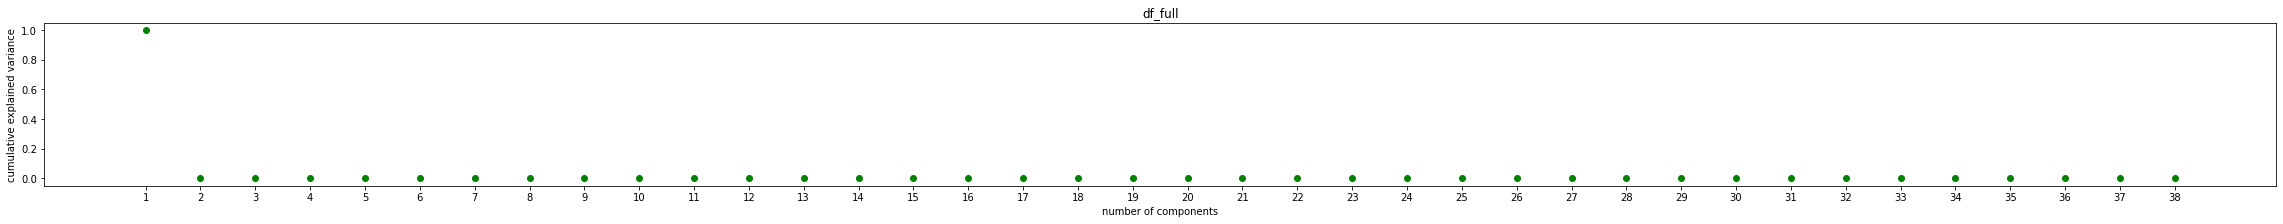

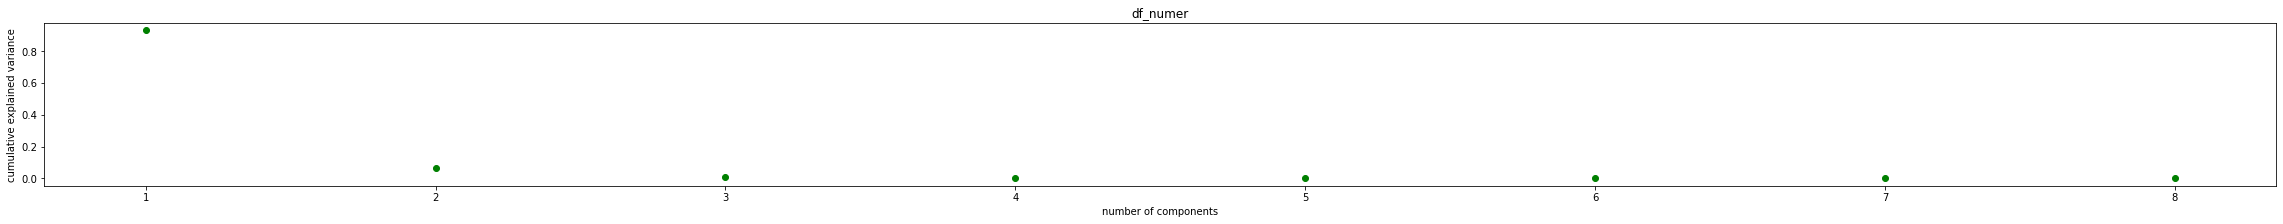

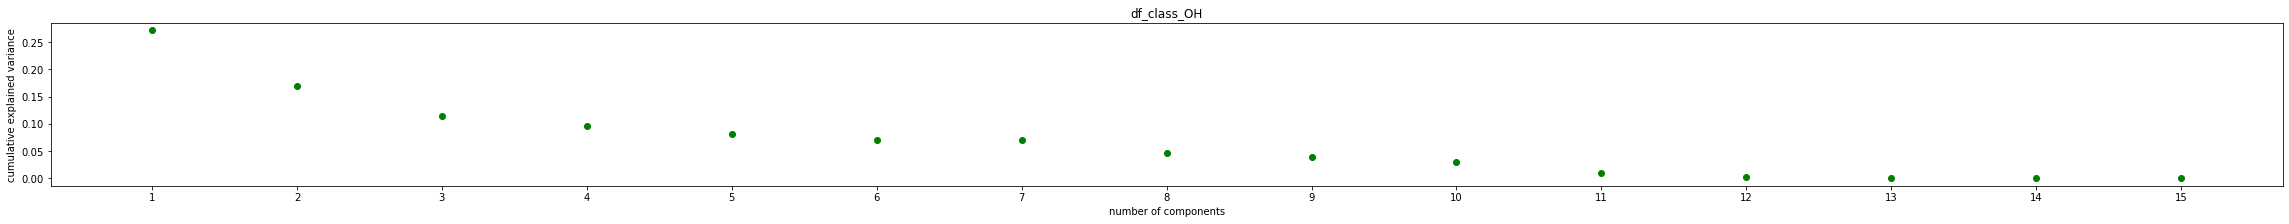

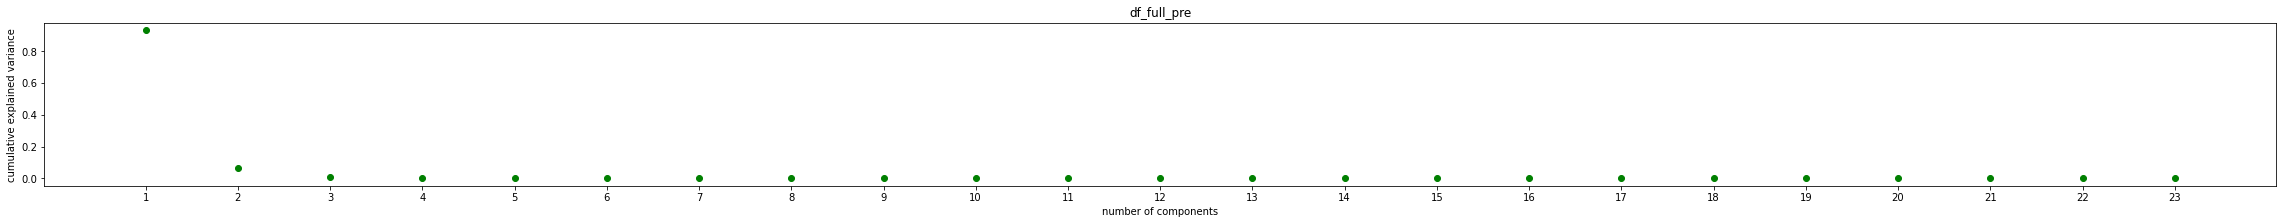

In [595]:
Pca_select(df_full,'df_full')
Pca_select(df_numer,'df_numer')
Pca_select(df_class_OH,'df_class_OH')
Pca_select(df_full_pre,'df_full_pre')

จากภาพจากทำ PCA ชุดข้อมูลทั้ง 4 ตัวทำให้สามารถเลือก components ได้ดั้งนี้
- df_full มี components 2 ตัว
- df_numer มี components 3 ตัว
- df_class_OH มี components 11 ตัว
- df_full_pre มี components 3 ตัว

In [596]:
pca = PCA(n_components = 2)
df_full_PCA = pca.fit_transform(df_full)
df_full_PCA  = pd.DataFrame(df_full_PCA)
pca = PCA(n_components = 3)
df_numer_PCA = pca.fit_transform(df_numer)
df_numer_PCA  = pd.DataFrame(df_numer_PCA)
pca = PCA(n_components = 11)
df_class_OH_PCA = pca.fit_transform(df_class_OH)
df_class_OH_PCA  = pd.DataFrame(df_class_OH_PCA)
pca = PCA(n_components = 3)
df_full_pre_PCA = pca.fit_transform(df_full_pre)
df_full_pre_PCA  = pd.DataFrame(df_full_pre_PCA)
df_full_pre_PCA
# print(df_full_PCA.head())
# print(df_numer_PCA.head())
# print(df_class_OH_PCA.head())
# print(df_full_pre_PCA.head())

,0,1,2
0,5850.149871,-3553.806102,-395.440642
1,-469.106568,-3101.455374,-299.353474
2,-6664.303495,-2230.729142,-1377.259770
3,-8625.035882,-2787.045140,1717.878759
4,-4882.065139,-3388.098792,-1352.133889
...,...,...,...
10122,-6494.584829,11411.706471,596.634623
10123,-6665.728474,4710.416555,1151.244201
10124,-3449.249729,6026.927755,-1554.624604
10125,-3720.885977,4142.253413,-1514.088157


## Model Building & Model Training

หาค่า k ที่เหมาะสม

In [597]:
#import machine learning library
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [598]:
# function
#Calcutate distance
def get_distance(X,Y,x_point,y_point):
  return np.sort(np.sqrt((X-x_point)**2 + (Y-y_point)**2))
#Calcutate Silhoue and wcss
def Silhoue_and_WCSS(Data_set,name):
  Num_K = [i+2 for i in range(9)]
  silhouette_coef = []
  plt.figure(figsize=(15, 5))
  plt.suptitle(name)
  for k in Num_K:
    kmeans = KMeans(n_clusters=k, random_state=1,)
    model = kmeans.fit(Data_set)
    labels = model.labels_
    silhouette_coef.append(metrics.silhouette_score(Data_set, labels, metric='euclidean'))
    
  plt.subplot(121)
  plt.scatter(Num_K,silhouette_coef)
  plt.plot(Num_K,silhouette_coef)
  plt.title('Silhouette coefficients')
  plt.ylabel('Scores')
  plt.xlabel('k')

  Num_K = [i+1 for i in range(10)]
  WCSS = []

  for k in Num_K:
    kmeans = KMeans(n_clusters=k, random_state=1,)
    model = kmeans.fit(Data_set)
    WCSS.append(model.inertia_)
  
  plt.subplot(122)
  plt.scatter(Num_K,WCSS )
  plt.plot(Num_K,WCSS )
  plt.title('WCSS')
  plt.ylabel('Scores')
  plt.xlabel('k')
  plt.show()

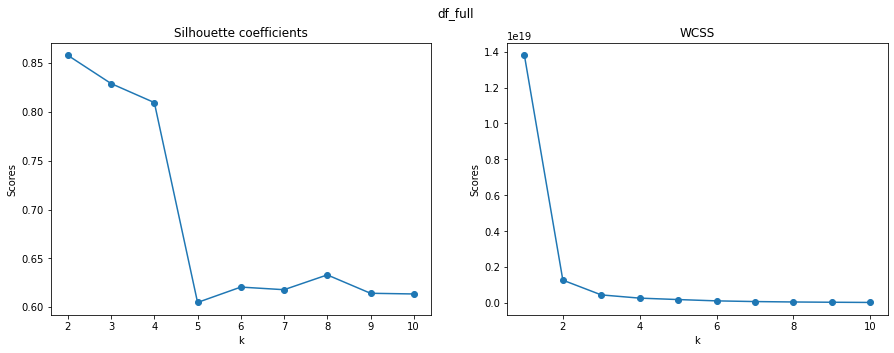

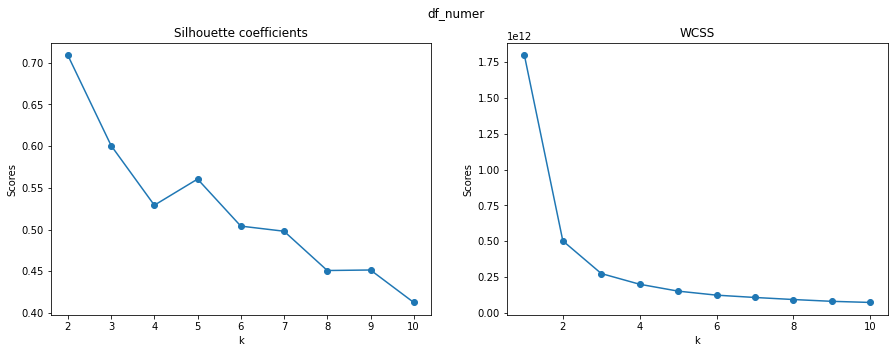

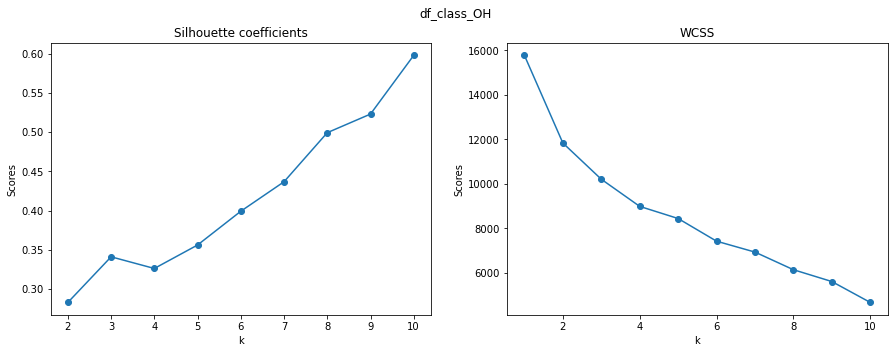

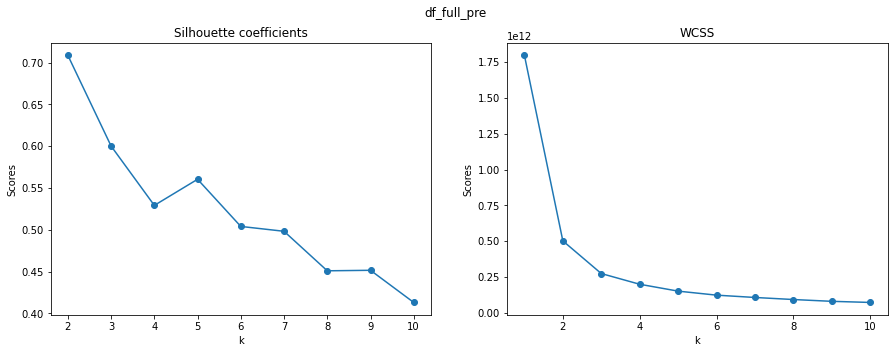

In [599]:
Silhoue_and_WCSS(df_full,'df_full')
Silhoue_and_WCSS(df_numer,'df_numer')
Silhoue_and_WCSS(df_class_OH,'df_class_OH')
Silhoue_and_WCSS(df_full_pre,'df_full_pre')

หลัง PCA

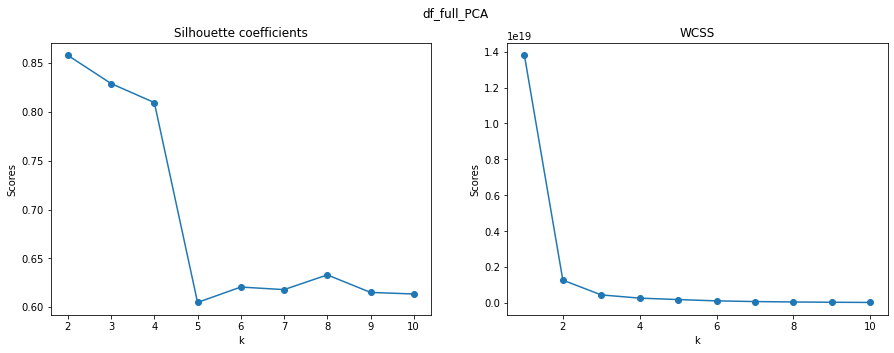

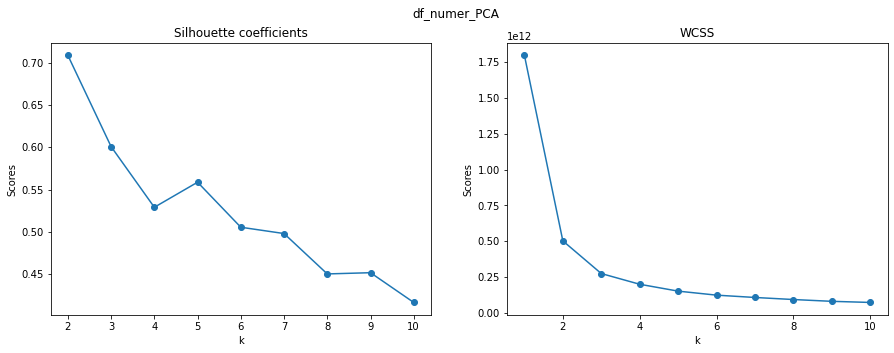

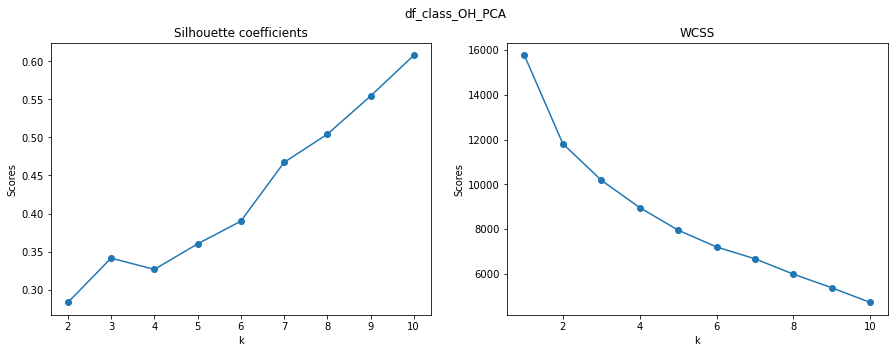

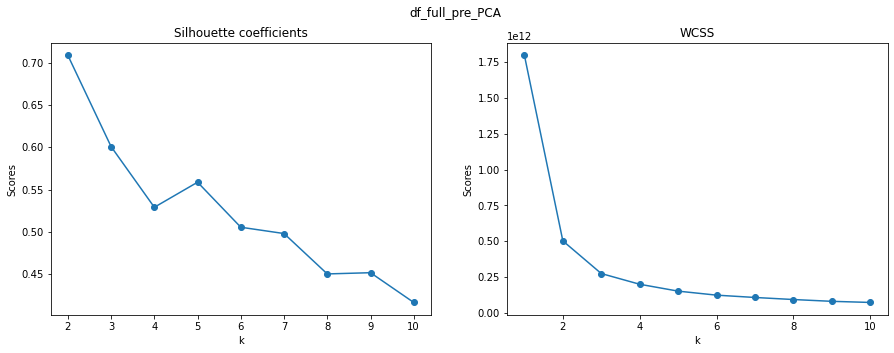

In [600]:
Silhoue_and_WCSS(df_full_PCA,'df_full_PCA')
Silhoue_and_WCSS(df_numer_PCA,'df_numer_PCA')
Silhoue_and_WCSS(df_class_OH_PCA,'df_class_OH_PCA')
Silhoue_and_WCSS(df_full_pre_PCA,'df_full_pre_PCA')

จากภาพผมจึงได้เลือกค่า k ดั้งนี้
- df_full           มีค่า k หรือ number of cluster เป็น 2
- df_numer          มีค่า k หรือ number of cluster เป็น 3
- df_class_OH       มีค่า k หรือ number of cluster เป็น 2
- df_full_pre       มีค่า k หรือ number of cluster เป็น 3
- df_full_PCA       มีค่า k หรือ number of cluster เป็น 2
- df_numer_PCA      มีค่า k หรือ number of cluster เป็น 3
- df_class_OH_PCA   มีค่า k หรือ number of cluster เป็น 2
- df_full_pre_PCA   มีค่า k หรือ number of cluster เป็น 3

In [615]:
def clusters_2(model,name):
    kmeans = KMeans(n_clusters=2, random_state=1,)
    model_Kmean2 = kmeans.fit(model)
    labels = model_Kmean2.labels_
    labels_test = df_y.replace(["Existing Customer","Attrited Customer"],[1,0])
    from sklearn.metrics import classification_report,confusion_matrix
    print("Classification report of "+str(name)+"\n=======================")
    print(classification_report(y_true=labels_test, y_pred=labels))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=labels_test, y_pred=labels))
def clusters_3(model,name):
    kmeans = KMeans(n_clusters=3, random_state=1,)
    model_Kmean3 = kmeans.fit(model)
    labels = model_Kmean3.labels_
    labels_test = df_y.replace(["Existing Customer","Attrited Customer"],[1,0])
    from sklearn.metrics import classification_report,confusion_matrix
    print("Classification report of "+str(name)+"\n=======================")
    print(classification_report(y_true=labels_test, y_pred=labels))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=labels_test, y_pred=labels))

In [616]:
clusters_2(df_full,'df_full')
clusters_2(df_full_PCA,'df_full_PCA')

Classification report of df_full
              precision    recall  f1-score   support

           0       0.14      0.27      0.18      1627
           1       0.83      0.67      0.74      8500

    accuracy                           0.61     10127
   macro avg       0.48      0.47      0.46     10127
weighted avg       0.72      0.61      0.65     10127

Confusion matrix 
[[ 441 1186]
 [2785 5715]]
Classification report of df_full_PCA
              precision    recall  f1-score   support

           0       0.14      0.27      0.18      1627
           1       0.83      0.67      0.74      8500

    accuracy                           0.61     10127
   macro avg       0.48      0.47      0.46     10127
weighted avg       0.72      0.61      0.65     10127

Confusion matrix 
[[ 441 1186]
 [2785 5715]]


In [617]:
clusters_2(df_class_OH,'df_class_OH')
clusters_2(df_class_OH_PCA,'df_class_OH_PCA')

Classification report of df_class_OH
              precision    recall  f1-score   support

           0       0.17      0.56      0.26      1627
           1       0.85      0.47      0.60      8500

    accuracy                           0.48     10127
   macro avg       0.51      0.52      0.43     10127
weighted avg       0.74      0.48      0.55     10127

Confusion matrix 
[[ 918  709]
 [4522 3978]]
Classification report of df_class_OH_PCA
              precision    recall  f1-score   support

           0       0.15      0.44      0.22      1627
           1       0.83      0.53      0.65      8500

    accuracy                           0.52     10127
   macro avg       0.49      0.48      0.44     10127
weighted avg       0.72      0.52      0.58     10127

Confusion matrix 
[[ 709  918]
 [3978 4522]]


In [618]:
clusters_3(df_full_pre,'df_full_pre')

Classification report of df_full_pre
              precision    recall  f1-score   support

           0       0.14      0.18      0.16      1627
           1       0.84      0.11      0.19      8500
           2       0.00      0.00      0.00         0

    accuracy                           0.12     10127
   macro avg       0.33      0.10      0.12     10127
weighted avg       0.73      0.12      0.18     10127

Confusion matrix 
[[ 297  172 1158]
 [1765  900 5835]
 [   0    0    0]]


c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [620]:
clusters_3(df_full_pre_PCA,'df_full_pre_PCA')

Classification report of df_full_pre_PCA
              precision    recall  f1-score   support

           0       0.15      0.18      0.16      1627
           1       0.83      0.69      0.75      8500
           2       0.00      0.00      0.00         0

    accuracy                           0.61     10127
   macro avg       0.33      0.29      0.31     10127
weighted avg       0.72      0.61      0.66     10127

Confusion matrix 
[[ 297 1158  172]
 [1746 5855  899]
 [   0    0    0]]


c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [621]:
clusters_3(df_numer,'df_numer')

Classification report of df_numer
              precision    recall  f1-score   support

           0       0.16      0.11      0.13      1627
           1       0.83      0.69      0.75      8500
           2       0.00      0.00      0.00         0

    accuracy                           0.59     10127
   macro avg       0.33      0.26      0.29     10127
weighted avg       0.73      0.59      0.65     10127

Confusion matrix 
[[ 172 1158  297]
 [ 899 5852 1749]
 [   0    0    0]]


c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [622]:
clusters_3(df_numer_PCA,'df_numer_PCA')

Classification report of df_numer_PCA
              precision    recall  f1-score   support

           0       0.15      0.18      0.16      1627
           1       0.83      0.69      0.75      8500
           2       0.00      0.00      0.00         0

    accuracy                           0.61     10127
   macro avg       0.33      0.29      0.31     10127
weighted avg       0.72      0.61      0.66     10127

Confusion matrix 
[[ 297 1158  172]
 [1746 5855  899]
 [   0    0    0]]


c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## สรุปผล

จากทดลองพบว่าชุดข้อมูลทั้ง 4 ชุดหลังจากทำ PCA แล้วชุดข้อมูลที่มีการแบ่ง 2 Clusters จะมีค่าโดยรวมเท่าเดิมยกเว้น ชุดข้อมูล df_class_OH ที่หลังจากทำ PCA แล้วผลการจัดกลุ่มสลับกับผลการจัดกลุ่มเดิม
ในชุดข้อมูลที่มีการแบ่ง 3 Clusters พบว่ามี Sample บางส่วนถูกจัดให้อยู่ใน Clusters ที่ 3 แต่หลังจากทำ PCA แล้วผลการจัดกลุ่มสลับกับผลการจับกลุ่มเดิม ดังนั้นการขั้นตอนการทำ Preprocess จึงส่งผลมากกับการแบ่งกลุ่ม